## Principal component Analysis - PCA

## Objective:
Apply PCA on iris dataset and doing dimensionality reduction

## Dataset Information:
#### Dataset source: https://www.kaggle.com/datasets/uciml/iris

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

- Id
- SepalLengthCm
- SepalWidthCm
- PetalLengthCm
- PetalWidthCm
- Species

## Import required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

In [4]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Iris.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
## check the shape 
df.shape

(150, 6)

In [6]:
## check basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## PCA: algorithm
 - 1) Standardize the data
 - 2) Calculate the covariance matrix
 - 3) Calculate eigenvectors and eigenvalues of the covariance matrix
 - 4) Rank eigenvectors by its corresponding eigenvalues
 - 5) Obtain P with its column vectors corresponding to the top k eigenvectors

## Step1: `Standardize the data.`
- First step is to standardize the data that we have so that PCA works properly.

In [7]:
## dropping redundant columns
df.drop('Id',axis=1,inplace=True)

In [8]:
## separate target and independent variables
X = df.drop('Species',axis=1)
y = df['Species']

In [9]:
## standardizing the data using standard scalar
ss = StandardScaler()

X_scaled = ss.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled,columns=X.columns)
X_scaled.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977


## Step2: `Calculate the covariance matrix.`

In [10]:
cov_matrix = np.cov(X_scaled.T)
print('Covariance matrix','\n',cov_matrix)

Covariance matrix 
 [[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


### Understand the data using pairplot.

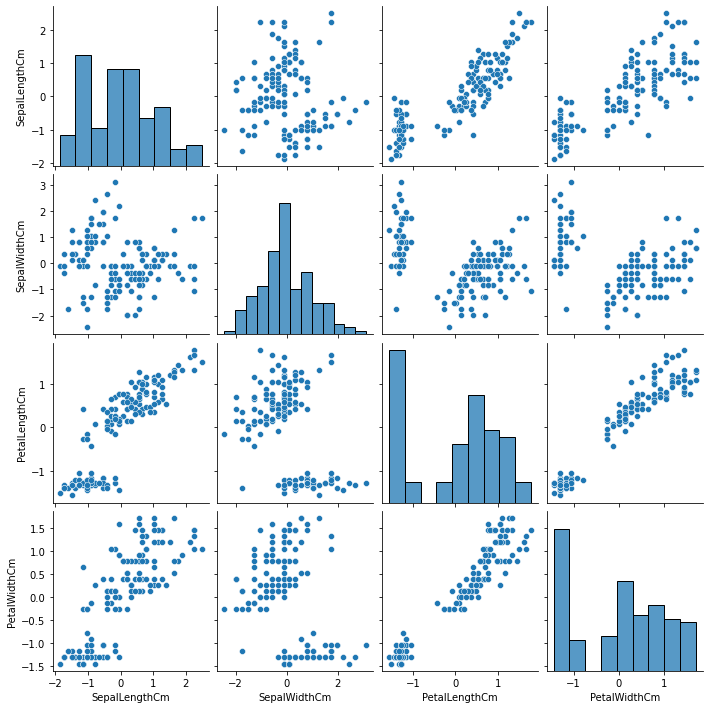

In [11]:
sns.pairplot(X_scaled)
plt.show()

## Step3: `Calculate the eigenvalues and eigenvectors.`

In [12]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [13]:
print('Eigen vectors:','\n',eig_vecs)
print('\n')
print('Eigen values:','\n',eig_vals)

Eigen vectors: 
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


Eigen values: 
 [2.93035378 0.92740362 0.14834223 0.02074601]


In [14]:
total = sum(eig_vals)
var_exp = [ (i/total)*100  for i in sorted(eig_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Variance Explained: ',var_exp)
print('Cummulative Variance Explained: ',cum_var_exp)

Variance Explained:  [72.77045209380135, 23.03052326768065, 3.683831957627379, 0.5151926808906321]
Cummulative Variance Explained:  [ 72.77045209  95.80097536  99.48480732 100.        ]


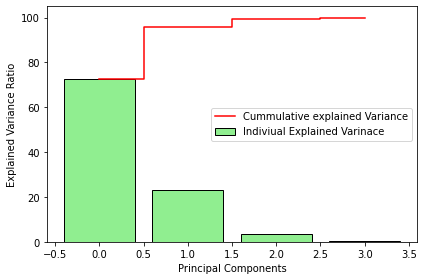

In [16]:
plt.bar(range(4),var_exp, align='center',color='lightgreen',edgecolor='black',label='Indiviual Explained Varinace')
plt.step(range(4), cum_var_exp, where='mid',color='red',label='Cummulative explained Variance')
plt.legend(loc = 'best')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.tight_layout()
plt.show()

## Interpretation.
- First three principal components explain 99% of the variance in the data. 
- so, we can choose the optimal number of principal components as 3.

## Now, Lets build a KNN classifier model by applying PCA

### Split and scale the dataset

In [17]:
## separate target and independent features
X = df.drop('Species',axis=1)
y = df['Species']

## split the datatset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## scale the independent features using standard scalar
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
X_train = pd.DataFrame(X_train,columns=X.columns)
X_test = pd.DataFrame(X_test,columns=X.columns)

### Lets apply PCA model on the data (optimal components obtained is 3) and build a KNN classifier model

In [18]:
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_pca,y_train)

KNeighborsClassifier()

In [20]:
y_train_pred = knn.predict(X_train_pca)
y_test_pred = knn.predict(X_test_pca)

## lets check the accuracy for train and test data
from sklearn.metrics import accuracy_score
print('train accuracy:',accuracy_score(y_train,y_train_pred))
print('test accuracy:',accuracy_score(y_test,y_test_pred))

train accuracy: 0.975
test accuracy: 1.0


-------
## Happy Learning:)
-----